## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [66]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                                                                                                                                                                                                                           0
0  bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  te...
1  story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turned into an insane  violent mob by the crazy chantings of it  s singers . unfort...
2  homelessness  or houselessness as george carlin stated  has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# * Build a Bag of Words representation of the reviews. (Only containing the 10.000 most frequent words)
vectorizer = CountVectorizer(max_features=10000)

# - Transform the reviews into a Bag of Words representation
X = vectorizer.fit_transform(reviews[0])

# * Show the shape of the matrix
print("Shape of the matrix: ", X.shape)

# * Split the data into a training and a test set (80% training, 20% test)
from sklearn.model_selection import train_test_split

# - Split the data into a training and a test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# * Split the training data into a training and a validation set (80% training, 20% validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

Shape of the matrix:  (25000, 10000)


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [68]:

# * How is a word represented in the Bag of Words? (Print the index of the word 'the')
print("Word 'the' is represented as: ", vectorizer.vocabulary_.get('the'))

# - New line for better readability
print()

# * How does a review look like in the Bag of Words? (Print the first review in the Bag of Words representation)
print("Review 0 in Bag of Words: ", X[0])

# - New line for better readability
print()

# * How many times does the word 'the' appear in the first review?
print("Word 'the' appears in the first review: ", X[0, vectorizer.vocabulary_.get('the')])

# - New line for better readability
print()

# * What is the word with index 4193 in the Bag of Words representation?
print("Word with index 4715: ", list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(4715)])

Word 'the' is represented as:  8945

Review 0 in Bag of Words:    (0, 4193)	5
  (0, 4715)	4
  (0, 1334)	1
  (0, 1735)	1
  (0, 4728)	2
  (0, 7082)	1
  (0, 549)	2
  (0, 8945)	9
  (0, 7663)	1
  (0, 9053)	1
  (0, 501)	2
  (0, 8254)	1
  (0, 6283)	1
  (0, 6897)	1
  (0, 12)	1
  (0, 7737)	2
  (0, 5182)	1
  (0, 8651)	1
  (0, 8864)	4
  (0, 5913)	2
  (0, 9955)	1
  (0, 4473)	2
  (0, 8866)	1
  (0, 6886)	1
  (0, 5099)	1
  :	:
  (0, 9772)	1
  (0, 8593)	2
  (0, 7330)	1
  (0, 9231)	1
  (0, 1180)	1
  (0, 2660)	1
  (0, 4443)	1
  (0, 1597)	1
  (0, 5222)	1
  (0, 4591)	1
  (0, 4171)	1
  (0, 7630)	1
  (0, 6219)	1
  (0, 9974)	1
  (0, 9737)	1
  (0, 3147)	1
  (0, 5465)	1
  (0, 139)	1
  (0, 177)	1
  (0, 8981)	1
  (0, 3277)	1
  (0, 3353)	1
  (0, 9759)	1
  (0, 6610)	1
  (0, 4721)	1

Word 'the' appears in the first review:  9

Word with index 4715:  is


**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [69]:

# - Train a neural network with a single hidden layer on the dataset. (Using TensorFlow)
from random import seed
import tensorflow as tf

# * Set the seed for reproducibility
seed(42)
tf.random.set_seed(42)

# * Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # - Input layer with the number of features
    tf.keras.layers.Dense(100, activation='relu'), # - #1 Hidden layer with 100 neurons
    tf.keras.layers.Dense(1, activation='sigmoid') # - Output layer with 1 neuron
])

# * Define the optimizer (SGD with learning rate of 0.001)
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

# * Compile the model
model.compile(loss = 'binary_crossentropy', optimizer=sgd, metrics=['accuracy']) # - Using 'categorical_crossentropy' as loss function and 'accuracy' as metric

# * Train the model (12 epochs, batch size of 12, learning rate of 0.001)
history = model.fit(X_train.toarray(), Y_train, epochs=12, batch_size=12, validation_data=(X_val.toarray(), Y_val))

# * Evaluate the model
loss, accuracy = model.evaluate(X_test.toarray(), Y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)


Epoch 1/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6078 - loss: 0.6609 - val_accuracy: 0.7135 - val_loss: 0.5888
Epoch 2/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7337 - loss: 0.5667 - val_accuracy: 0.7747 - val_loss: 0.5294
Epoch 3/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7790 - loss: 0.5117 - val_accuracy: 0.8015 - val_loss: 0.4882
Epoch 4/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8015 - loss: 0.4722 - val_accuracy: 0.8207 - val_loss: 0.4574
Epoch 5/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8197 - loss: 0.4431 - val_accuracy: 0.8335 - val_loss: 0.4345
Epoch 6/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8278 - loss: 0.4202 - val_accuracy: 0.8410 - val_loss: 0.4165
Epoch 7/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8390 - loss: 0.4014 - val_accuracy: 0.8493 - val_loss: 0.4016
Epoch 8/12
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8477 - loss: 0.3852 - 

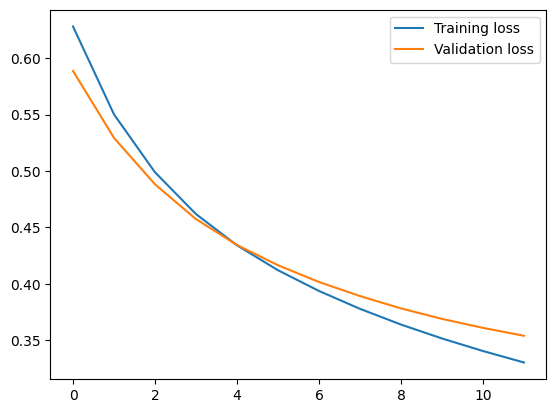

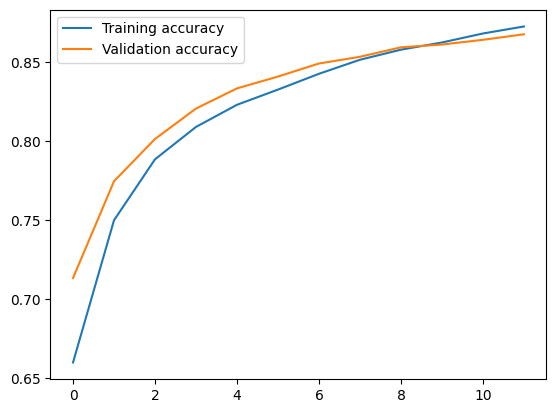

In [70]:

# * Plot the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# * Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [86]:

# - Test the model on the test set
predictions = model.predict(X_test.toarray())
predictions = (predictions > 0.5).astype(np.int_)

# * Make dataframe with the predictions and the true labels
df = pd.DataFrame({'predictions': predictions.flatten(), 'true_labels': Y_test.values.flatten()})

# - Include the review text in the dataframe
df['review'] = reviews.iloc[Y_test.index].values.flatten()

# * Make 'Review' the first column
df = df[['review', 'predictions', 'true_labels']]

# * Show the first 10 rows of the dataframe
display(df.head(10))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,review,predictions,true_labels
0,like his elder brothers claude sautet and jean pierre melville alain corneau began to cut his teeth in french cinema with a series of fine thrillers la menace and srie noire among others . police python is a good example o...,1,1
1,wow . . . i mean wow this has got to be one of the best story s i ve ever had the chance to read watch . we all know this famous story . two martial artist a man and his son go to train in the forbidden cursed springs and while ignoring thei...,0,1
2,by the end of the first hour my jaw was nestled comfortably between my feet . the movie never and i do mean never lets up in action . it may be mild action but it s action . once again every member of the cast fits perfectly . the explosions w...,1,1
3,part of the enjoyment that i took from this film stemmed from the fact that i knew nothing more about it than that it starred john turturro and emily watson reasons enough to watch was a period piece and involved chess . everything that evolv...,1,1
4,we viewed the vcr and found it to be fascinating . not knowing anything about this true story i thought oh no p . brosnan as an american indian red indian in the film what a bad choice until i discovered the truth about grey owl . the f...,1,1
5,as a study of the frailties of human nature in the context of old age this film is without parallel . it is quite simply brilliant . full marks to everyone from the scriptwriter to all involved in the finished product . you can only marvel at...,1,1
6,myself and my groovadelic something pals just can t get enough of this awesome parker posey classic i tried renting this on dvd but can t seem to find it too bad as i m sure the features would be extra special we all highly recomm...,0,1
7,even thought i m not the biggest of cher fans this movie was her crowning achievement . granted there were long term side effects and risks of brain damage memory loss and intellectual impairment upon the screening such a film . a sur...,1,0
8,this is a quirky little movie and i have to agree that there is some quirky acting in it as well . br br it follows the adventures of a young man who decides that he wants to become a famous las vegas illusionist and is partly about follo...,1,1
9,its hard to make heads or tails of this film . unless you re well oiled and in the mood to mock don t view santa claus . it mixes santa satan merlin and moralizing in a most unappetizing way . it certainly is not for fretful children .,1,0


In [72]:
# * Show the first 10 predictions where the model was wrong
display(df[df['predictions'] != df['true_labels']].head(10))

,review,predictions,true_labels
1,wow . . . i mean wow this has got to be one of the best story s i ve ever had the chance to read watch . we all know this famous story . two martial artist a man and his son go to train in the forbidden cursed springs and while ignoring thei...,0,1
6,myself and my groovadelic something pals just can t get enough of this awesome parker posey classic i tried renting this on dvd but can t seem to find it too bad as i m sure the features would be extra special we all highly recomm...,0,1
7,even thought i m not the biggest of cher fans this movie was her crowning achievement . granted there were long term side effects and risks of brain damage memory loss and intellectual impairment upon the screening such a film . a sur...,1,0
9,its hard to make heads or tails of this film . unless you re well oiled and in the mood to mock don t view santa claus . it mixes santa satan merlin and moralizing in a most unappetizing way . it certainly is not for fretful children .,1,0
14,although i love this movie i can barely watch it it is so real . so i put it on tonight and hid behind my bank of computers . i remembered it vividly but just wanted to see if i could find something i hadn t seen before . . . . . . . . i did...,0,1
24,this movie is a true reflection of the australian resourcefulness that has been required to make this country what it is over the last years . not pompous like the british not gung ho like the americans . if either of those countries had att...,0,1
26,i have complained to abc about the cancellation of six degrees . if enough people do the same then it could be enough to bring this fabulous show back to life just go onto the official site and the rest is simple enough . i do not understand wh...,0,1
28,. . . and in no way as clean logical and understandable as in pictured in that pathetic sum of tired hollywood cliches . br br i m and i ve spent years of my life struggling through delusional phobia and paranoid hallucinations . ...,1,0
32,snow white which just came out in locarno where i had the chance to see it of course refers to the world famous fairy tale . and it also refers to coke . in the end real snow of the swiss alps plays its part as well . br br thus all thr...,1,0
39,riding giants is an amazing movie . it really shows how these people lived back then just to surf . their lives were basically surfing living breathing and having fun . they didn t care about money jobs girls or any thing . to them the wave...,0,1


In [73]:
# * Show the first 10 predictions where the model was right
display(df[df['predictions'] == df['true_labels']].head(10))

,review,predictions,true_labels
0,like his elder brothers claude sautet and jean pierre melville alain corneau began to cut his teeth in french cinema with a series of fine thrillers la menace and srie noire among others . police python is a good example o...,1,1
2,by the end of the first hour my jaw was nestled comfortably between my feet . the movie never and i do mean never lets up in action . it may be mild action but it s action . once again every member of the cast fits perfectly . the explosions w...,1,1
3,part of the enjoyment that i took from this film stemmed from the fact that i knew nothing more about it than that it starred john turturro and emily watson reasons enough to watch was a period piece and involved chess . everything that evolv...,1,1
4,we viewed the vcr and found it to be fascinating . not knowing anything about this true story i thought oh no p . brosnan as an american indian red indian in the film what a bad choice until i discovered the truth about grey owl . the f...,1,1
5,as a study of the frailties of human nature in the context of old age this film is without parallel . it is quite simply brilliant . full marks to everyone from the scriptwriter to all involved in the finished product . you can only marvel at...,1,1
8,this is a quirky little movie and i have to agree that there is some quirky acting in it as well . br br it follows the adventures of a young man who decides that he wants to become a famous las vegas illusionist and is partly about follo...,1,1
10,well . . . now that i know where rob zombie stole the title for his house of corpses crapfest i can now rest in peace . nothing about the somnambulant performances or trite script would raise the dead in the house of seven corpses but ...,0,0
11,the director tries to be quentin tarantino the screenwriters try to be tennessee williams deborah kara unger tries to be faye dunaway the late james coburn tries to be orson welles michael rooker tries to be gene hackman mary tyler moore tri...,0,0
12,probably the worst bollywood film i ve seen . br br no plot line . very little character developments . br br full of silly and pointless humor . the whole film was chaotic and direction less . there was no proper ending to the stor...,0,0
13,the th oscars was a very good one . whoopi s work as emcee was very funny and light . i personally loved her last apperance which garnered some frigid reviews due to coarse language and salacious jokes but that s fine . the audience seemed...,1,1


**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [74]:
# * Predict the sentiment of the following two sentences
sentences = ['This movie is fantastic!', 'I did not like this movie.']
sentences = vectorizer.transform(sentences)

# - Print if the sentiment is positive or negative
print("Sentiment of the first sentence: ", "Positive" if model.predict(sentences[0]) > 0.5 else "Negative")
print("Sentiment of the second sentence: ", "Positive" if model.predict(sentences[1]) > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Sentiment of the first sentence:  Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Sentiment of the second sentence:  Negative
